# Classifying Cats and Dogs Using Convolutional Neural Networks

 The aim of the project is to develop and train a convolutional neural network (CNN) model capable of accurately classifying images of cats and dogs based on their visual features.

### Importing Dependency

In [1]:
import os
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

## Loading Dataset
### Spliting data into Train and test 

## TRAIN DATA

In [2]:
trn_path=r"training_data"
train_ds = keras.utils.image_dataset_from_directory(
    directory=trn_path,
    labels='inferred',
    label_mode='int',
    batch_size=100,
    image_size=(128, 128))

Found 8004 files belonging to 2 classes.


Class names :-  ['Cat', 'Dog']


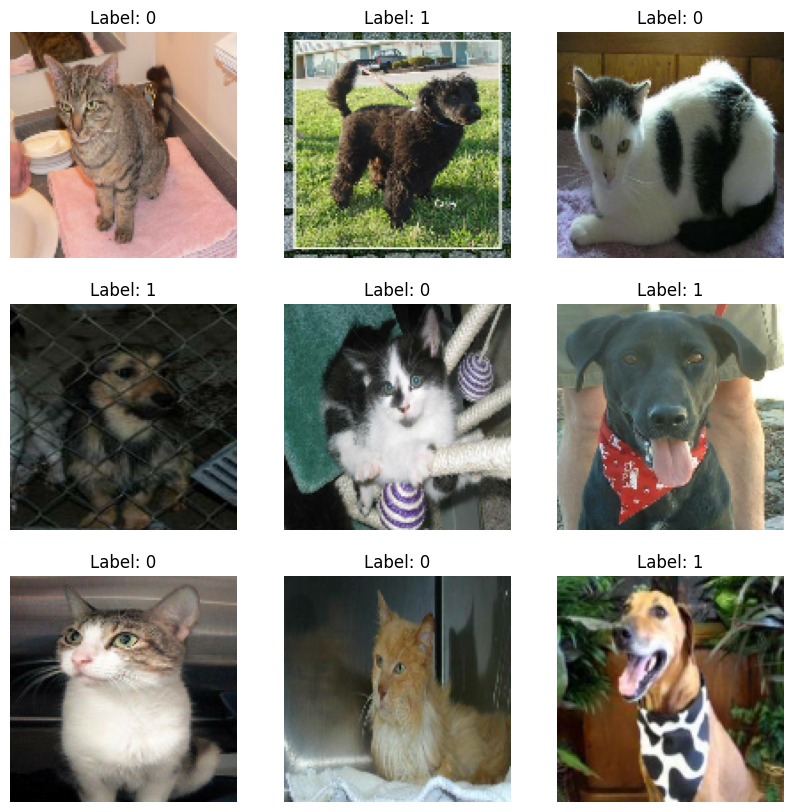

In [3]:
print("Class names :- ",train_ds.class_names)
for images, labels in train_ds:
    plt.figure(figsize=(10, 10))
    for i in range(9):  
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis("off")
    plt.show()
    break  


## TEST DATA

In [4]:
tst_path = r"test_data"
test_ds = keras.utils.image_dataset_from_directory(
    directory=tst_path,
    labels='inferred',
    label_mode='int',
    batch_size=100,
    image_size=(128, 128))


Found 1992 files belonging to 2 classes.


### Feature Scaling

In [5]:
def normalize(image,label):
    image = tf.cast(image/255,tf.float32)
    return image,label
train_ds = train_ds.map(normalize)
test_ds = test_ds.map(normalize)

### Creating CNN Model Architecture

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten

In [7]:
model = Sequential()

model.add(Conv2D(filters=128,kernel_size=(3,3),padding="valid",activation="relu",
                        input_shape=(128, 128, 3),name="conv_1"))
model.add(MaxPool2D(pool_size=(2,2),name="pool_1"))


model.add(Conv2D(filters=64,kernel_size=(3,3),padding="valid",activation="relu",name="conv_2" ))
model.add(MaxPool2D(pool_size=(2,2),name="pool_2"))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="valid",activation="relu",name="conv_3" ))
model.add(MaxPool2D(pool_size=(2,2),name="pool_3"))

model.add(Conv2D(filters=16,kernel_size=(3,3),padding="valid",activation="relu",name="conv_4" ))
model.add(MaxPool2D(pool_size=(2,2),name="pool_4"))

model.add(Conv2D(filters=8,kernel_size=(3,3),padding="valid",activation="relu",name="conv_5" ))
model.add(MaxPool2D(pool_size=(2,2),name="pool_5"))

model.add(Flatten())

model.add(Dense(units=30,activation="relu",name="layer_1"))
model.add(Dense(units=2,activation="softmax",name="layer_3"))



d:\my_projects\Deep_Learning_Project\Cat & dog class CNN\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_1 (Conv2D)                 │ (None, 126, 126, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_1 (MaxPooling2D)           │ (None, 63, 63, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2 (Conv2D)                 │ (None, 61, 61, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_2 (MaxPooling2D)           │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_3 (Conv2D)                 │ (None, 28, 28, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_3 (MaxPooling2D)           │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_4 (Conv2D)                 │ (None, 12, 12, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_4 (MaxPooling2D)           │ (None, 6, 6, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_5 (Conv2D)                 │ (None, 4, 4, 8)        │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_5 (MaxPooling2D)           │ (None, 2, 2, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 30)             │           990 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 2)              │            62 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,676 (401.08 KB)

 Trainable params: 102,676 (401.08 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

## Adding Callback to track the model training 

In [10]:
log_path = r"tensorboard"
from keras.callbacks import TensorBoard
tensorboard_callback = TensorBoard(log_dir=log_path)

## Training CNN Model

In [11]:
history = model.fit(train_ds, epochs=10,callbacks=[tensorboard_callback],validation_data= test_ds)

Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.5254 - loss: 0.6909 - val_accuracy: 0.5055 - val_loss: 0.6945
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.6079 - loss: 0.6615 - val_accuracy: 0.5648 - val_loss: 0.6794
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.6458 - loss: 0.6318 - val_accuracy: 0.6140 - val_loss: 0.6768
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.6934 - loss: 0.5888 - val_accuracy: 0.5989 - val_loss: 0.7720
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.7213 - loss: 0.5497 - val_accuracy: 0.7490 - val_loss: 0.5317
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.7459 - loss: 0.5220 - val_accuracy: 0.7600 - val_loss: 0.5109
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.7797 - loss: 0.4727 - val_accuracy: 0.7500 - val_loss: 0.5080
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.7815 - loss: 0.4675 - val_accuracy: 0.6918 - v

In [12]:
model.evaluate(test_ds)

20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 380ms/step - accuracy: 0.7786 - loss: 0.4698


[0.4697788953781128, 0.7786144614219666]

## Ploting Model Training

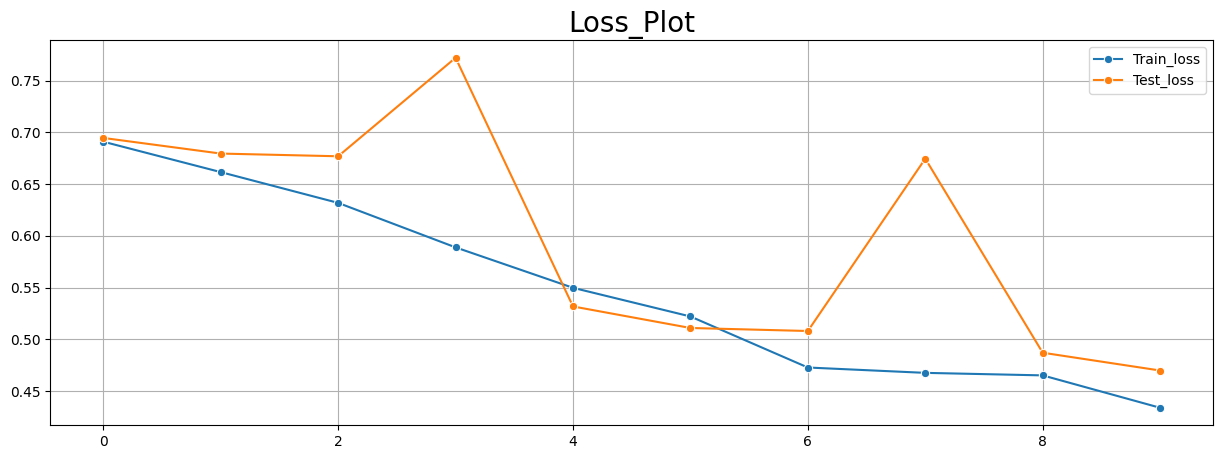

In [14]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.lineplot(history.history["loss"],label="Train_loss",marker="o")
sns.lineplot(history.history["val_loss"],label="Test_loss",marker="o")
plt.title("Loss_Plot",fontsize=20)
plt.grid()
plt.legend()
plt.show()

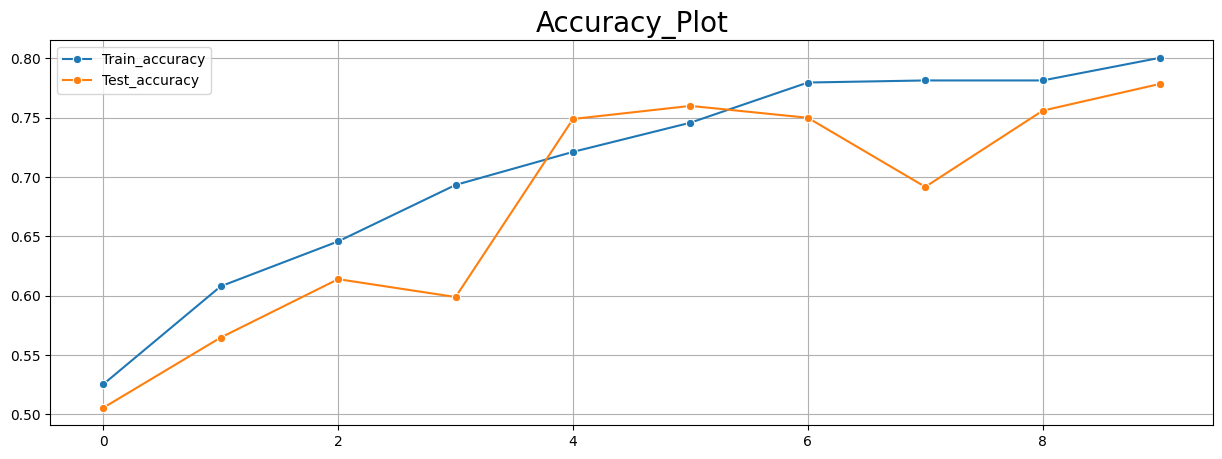

In [15]:
plt.figure(figsize=(15,5))
sns.lineplot(history.history["accuracy"],label="Train_accuracy",marker="o")
sns.lineplot(history.history["val_accuracy"],label="Test_accuracy",marker="o")
plt.title("Accuracy_Plot",fontsize=20)
plt.grid()
plt.legend()
plt.show()

## Training model on Argumented Data

In [16]:
arg_trn_path=r"augmented_training_data"
arg_train_ds = keras.utils.image_dataset_from_directory(
    directory=arg_trn_path,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(128, 128))

Found 17316 files belonging to 2 classes.


In [17]:
arg_train_ds = arg_train_ds.map(normalize)

## Creating New CNN Architecture with Batch Normalization Layers

In [18]:
from keras.layers import Dropout,BatchNormalization
model2 = Sequential()

model2.add(Conv2D(filters=128,kernel_size=(3,3),padding="valid",activation="relu",
                        input_shape=(128, 128, 3),name="conv_1"))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2),name="pool_1"))


model2.add(Conv2D(filters=64,kernel_size=(3,3),padding="valid",activation="relu",name="conv_2" ))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2),name="pool_2"))

model2.add(Conv2D(filters=32,kernel_size=(3,3),padding="valid",activation="relu",name="conv_3" ))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2),name="pool_3"))

model2.add(Conv2D(filters=16,kernel_size=(3,3),padding="valid",activation="relu",name="conv_4" ))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2),name="pool_4"))

model2.add(Conv2D(filters=8,kernel_size=(3,3),padding="valid",activation="relu",name="conv_5" ))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2),name="pool_5"))

model2.add(Flatten())

model2.add(Dense(units=30,activation="relu",name="layer_1"))
model2.add(Dense(units=2,activation="softmax",name="layer_3"))


d:\my_projects\Deep_Learning_Project\Cat & dog class CNN\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_1 (Conv2D)                 │ (None, 126, 126, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_1 (MaxPooling2D)           │ (None, 63, 63, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2 (Conv2D)                 │ (None, 61, 61, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_2 (MaxPooling2D)           │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_3 (Conv2D)                 │ (None, 28, 28, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_3 (MaxPooling2D)           │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_4 (Conv2D)                 │ (None, 12, 12, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_4 (MaxPooling2D)           │ (None, 6, 6, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_5 (Conv2D)                 │ (None, 4, 4, 8)        │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 4, 4, 8)        │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_5 (MaxPooling2D)           │ (None, 2, 2, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Dense)                 │ (None, 30)             │           990 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 2)              │            62 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,668 (404.95 KB)

 Trainable params: 103,172 (403.02 KB)

 Non-trainable params: 496 (1.94 KB)

In [20]:
model2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

In [22]:
log_path = r"tensorboard"
from keras.callbacks import TensorBoard
tensorboard_callback = TensorBoard(log_dir=log_path)

## Training new Model

In [23]:
history2 = model2.fit(arg_train_ds, epochs=5,validation_data= test_ds)

Epoch 1/5
542/542 ━━━━━━━━━━━━━━━━━━━━ 697s 1s/step - accuracy: 0.6086 - loss: 0.6651 - val_accuracy: 0.5115 - val_loss: 0.7735
Epoch 2/5
542/542 ━━━━━━━━━━━━━━━━━━━━ 792s 1s/step - accuracy: 0.6906 - loss: 0.5842 - val_accuracy: 0.6104 - val_loss: 0.7189
Epoch 3/5
542/542 ━━━━━━━━━━━━━━━━━━━━ 986s 2s/step - accuracy: 0.7258 - loss: 0.5401 - val_accuracy: 0.7535 - val_loss: 0.5168
Epoch 4/5
542/542 ━━━━━━━━━━━━━━━━━━━━ 1379s 3s/step - accuracy: 0.7644 - loss: 0.4926 - val_accuracy: 0.7892 - val_loss: 0.4651
Epoch 5/5
542/542 ━━━━━━━━━━━━━━━━━━━━ 1462s 3s/step - accuracy: 0.7901 - loss: 0.4464 - val_accuracy: 0.6938 - val_loss: 0.6220


In [24]:
model2.evaluate(test_ds)

20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6938 - loss: 0.6220


[0.6219989061355591, 0.6937751173973083]

## Ploting New Model Training

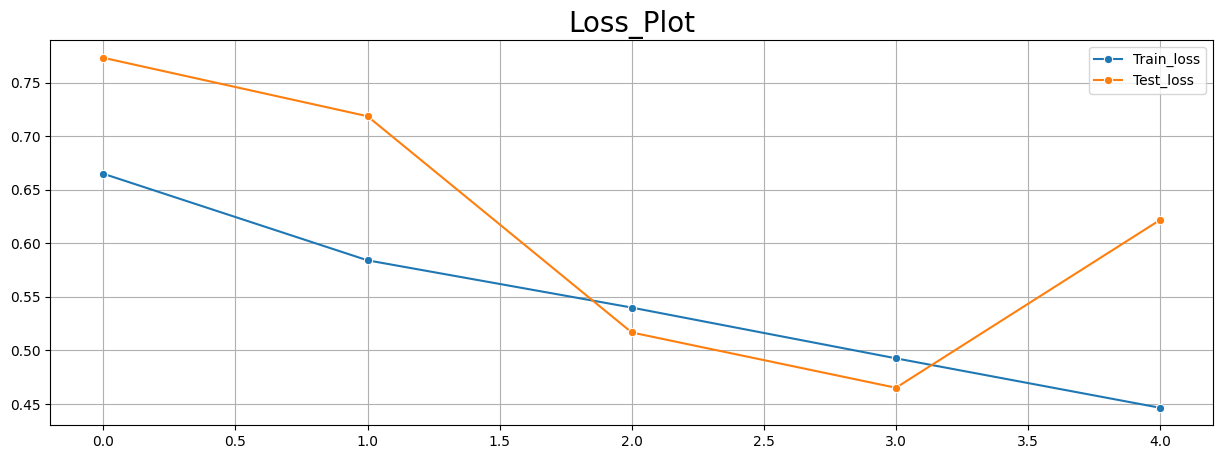

In [25]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.lineplot(history2.history["loss"],label="Train_loss",marker="o")
sns.lineplot(history2.history["val_loss"],label="Test_loss",marker="o")
plt.title("Loss_Plot",fontsize=20)
plt.grid()
plt.legend()
plt.show()

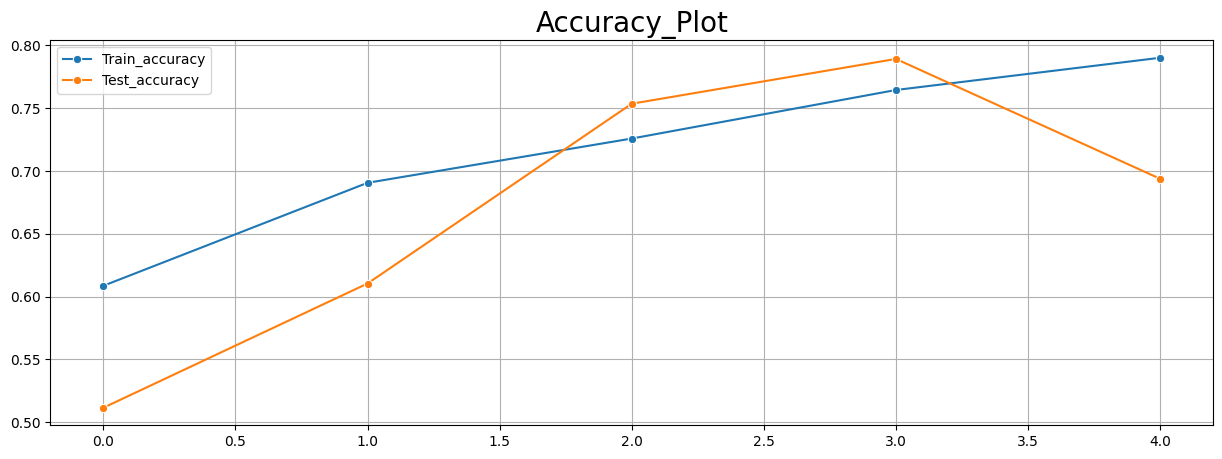

In [26]:
plt.figure(figsize=(15,5))
sns.lineplot(history2.history["accuracy"],label="Train_accuracy",marker="o")
sns.lineplot(history2.history["val_accuracy"],label="Test_accuracy",marker="o")
plt.title("Accuracy_Plot",fontsize=20)
plt.grid()
plt.legend()
plt.show()

# Testing Model

In [27]:
def Plot_image(path):
    img_path = os.path.join(path)   
    img = image.load_img(img_path, target_size=(299, 299)) 
    plt.imshow(img)
    plt.show()

In [28]:
def image_to_array(path):
    img_path = os.path.join(path)   
    img = image.load_img(img_path, target_size=(128, 128))  
    img_array = image.img_to_array(img)
    img_array_ = np.expand_dims(img_array, axis=0)
    img_array_prep = img_array_/255
    return img_array_prep

In [29]:
classes = ["Cat","Dog"]
def predict(path,model):
    img_array = image_to_array(path)
    predictions = model.predict(img_array)
    index = np.argmax(predictions)
    print("Final_Result :- ",classes[index])
    print("Probability  :- ",round(predictions[0][index],2), "%")

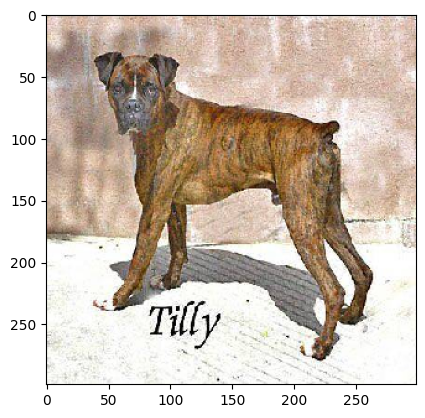

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
Final_Result :-  Dog
Probability  :-  0.96 %


In [31]:
img_path1 = r"training_data\DOg\dog.991.jpg"
Plot_image(img_path1)
predict(img_path1,model2)

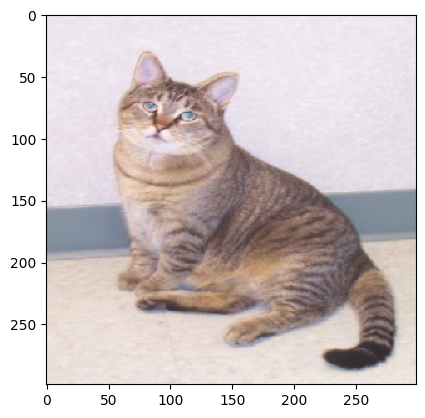

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Final_Result :-  Cat
Probability  :-  0.78 %


In [32]:
img_path2 = r"training_data\Cat\cat.998.jpg"
Plot_image(img_path2)
predict(img_path2,model2)

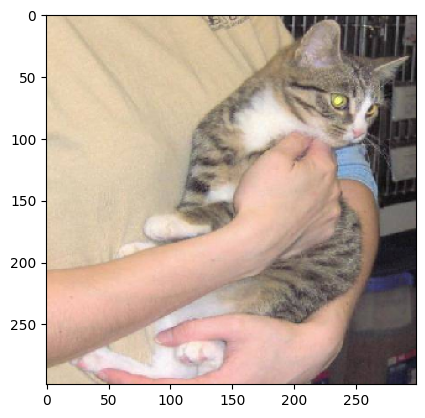

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Final_Result :-  Dog
Probability  :-  0.79 %


In [33]:
img_path3 = r"training_data\Cat\cat.765.jpg"
Plot_image(img_path3)
predict(img_path3,model2)

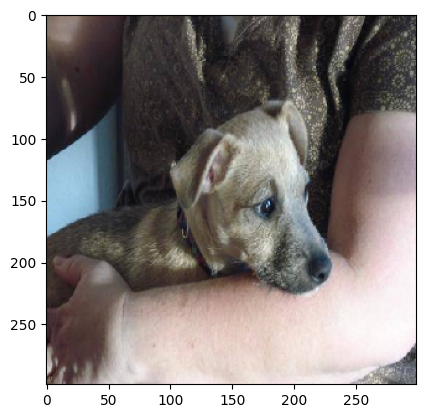

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Final_Result :-  Dog
Probability  :-  0.86 %


In [34]:
img_path4 = r"training_data\Dog\dog.945.jpg"
Plot_image(img_path4)
predict(img_path4,model2)

# The End...